# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

query_url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # Create endpoint URL with each city
    city_url = query_url + '&q=' + city
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # 
    try:
    #     # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

    #     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# print(json.dumps(city_url, indent=4, sort_keys=True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | san policarpo
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | hay river
Processing Record 8 of Set 1 | kosh-agach
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | bontang
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,23.18,86,100,6.69,US,1680963380
1,upernavik,72.7868,-56.1549,-24.98,90,100,7.56,GL,1680963476
2,san policarpo,12.1791,125.5072,26.15,81,41,4.42,PH,1680963530
3,viedma,-40.8135,-62.9967,20.13,63,65,5.03,AR,1680963270
4,mataura,-46.1927,168.8643,5.62,97,100,1.28,NZ,1680963473


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,23.18,86,100,6.69,US,1680963380
1,upernavik,72.7868,-56.1549,-24.98,90,100,7.56,GL,1680963476
2,san policarpo,12.1791,125.5072,26.15,81,41,4.42,PH,1680963530
3,viedma,-40.8135,-62.9967,20.13,63,65,5.03,AR,1680963270
4,mataura,-46.1927,168.8643,5.62,97,100,1.28,NZ,1680963473


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

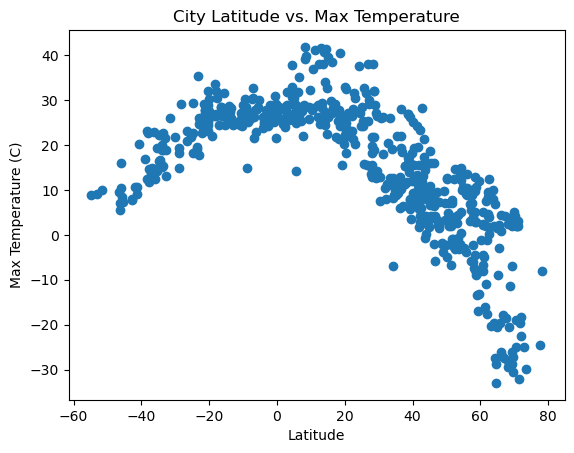

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

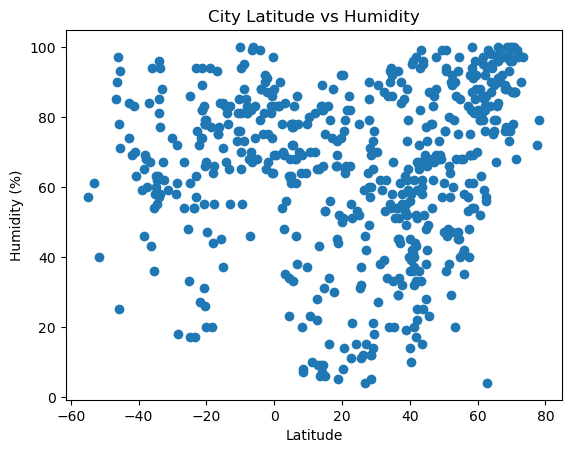

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

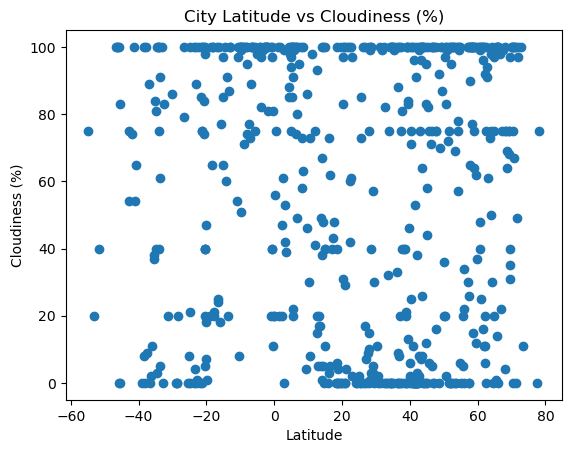

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

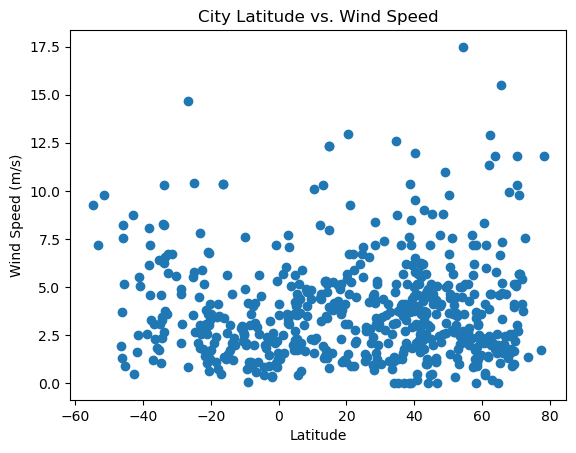

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def lregress(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.show()
    print('R-value:', rvalue)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,23.18,86,100,6.69,US,1680963380
1,upernavik,72.7868,-56.1549,-24.98,90,100,7.56,GL,1680963476
2,san policarpo,12.1791,125.5072,26.15,81,41,4.42,PH,1680963530
5,hay river,60.8156,-115.7999,4.99,52,48,4.12,CA,1680963331
6,kosh-agach,50.0000,88.6667,-2.23,61,36,5.08,RU,1680963531


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,viedma,-40.8135,-62.9967,20.13,63,65,5.03,AR,1680963270
4,mataura,-46.1927,168.8643,5.62,97,100,1.28,NZ,1680963473
7,cape town,-33.9258,18.4232,19.51,57,40,10.29,ZA,1680963300
8,esperance,-33.8667,121.9000,15.20,85,100,6.22,AU,1680963426
9,geraldton,-28.7667,114.6000,19.23,72,0,4.63,AU,1680963398


###  Temperature vs. Latitude Linear Regression Plot

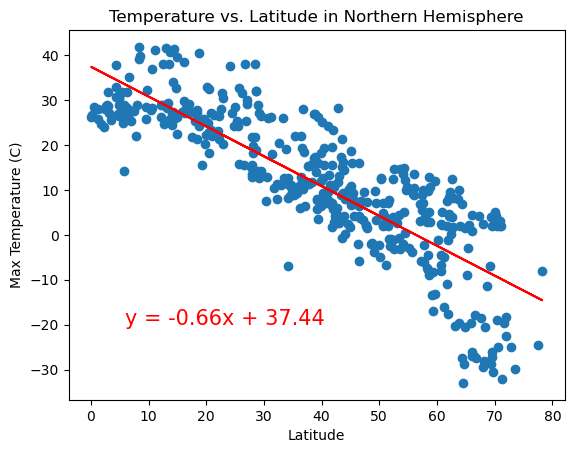

R-value: -0.8426770698258367


In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
lregress(x_values,y_values, 'Temperature vs. Latitude in Northern Hemisphere', (6,-20))


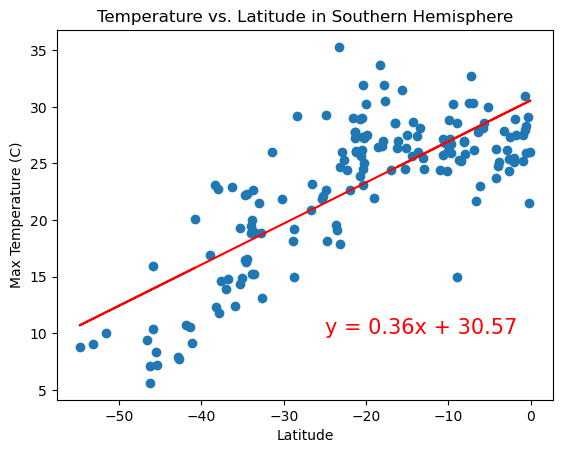

R-value: 0.7700478139840649


In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
lregress(x_values,y_values, 'Temperature vs. Latitude in Southern Hemisphere', (-25,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

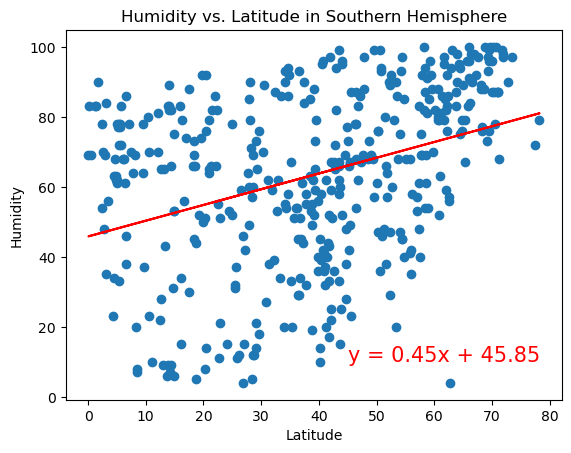

R-value: 0.3630641019829983


In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lregress(x_values,y_values, 'Humidity vs. Latitude in Southern Hemisphere', (45,10))

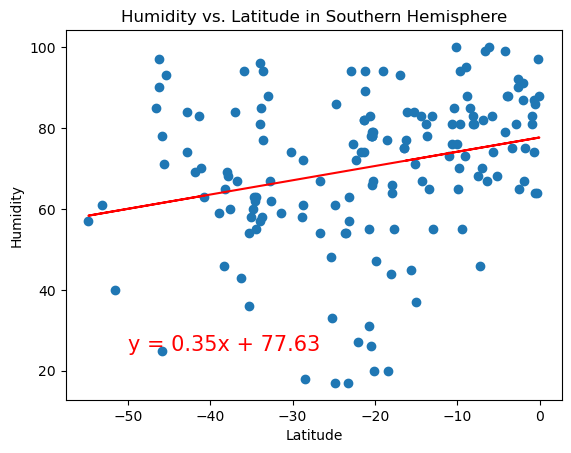

R-value: 0.25988540333444315


In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lregress(x_values,y_values, 'Humidity vs. Latitude in Southern Hemisphere', (-50,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

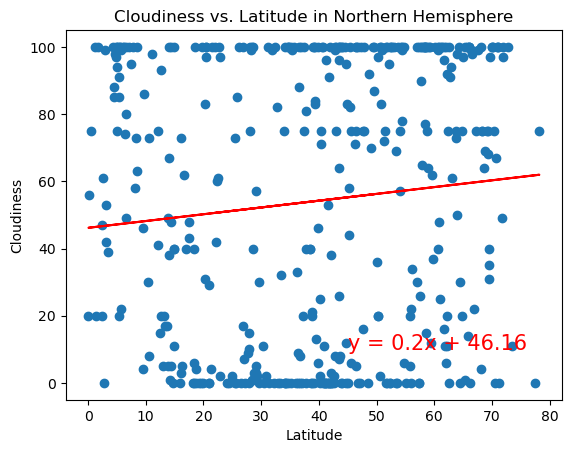

R-value: 0.09881314314286634


In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lregress(x_values,y_values, 'Cloudiness vs. Latitude in Northern Hemisphere', (45,10))

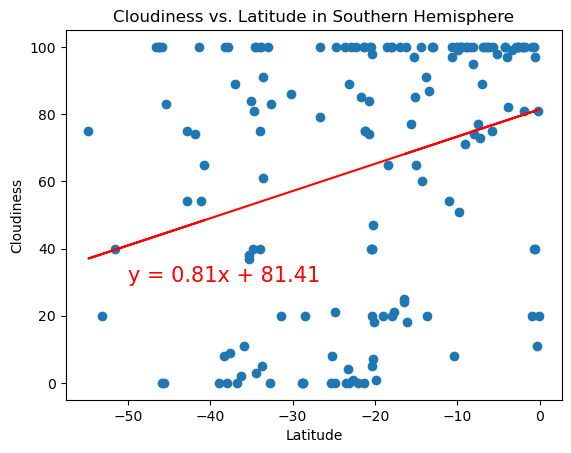

R-value: 0.28810943029458774


In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lregress(x_values,y_values, 'Cloudiness vs. Latitude in Southern Hemisphere', (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

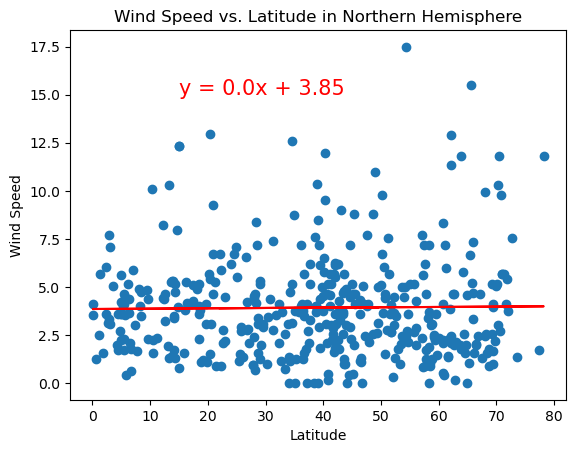

R-value: 0.013454621683869893


In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lregress(x_values,y_values, 'Wind Speed vs. Latitude in Northern Hemisphere', (15,15))

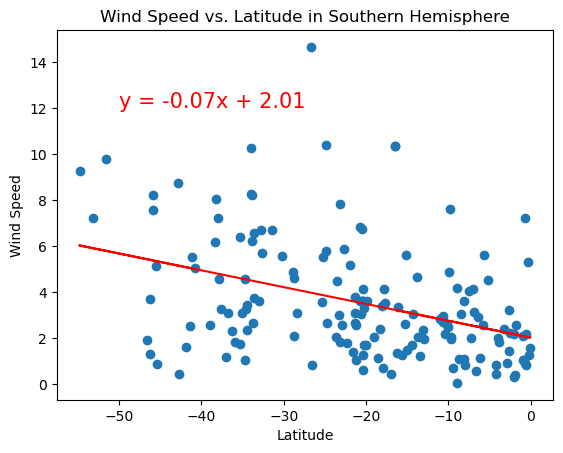

R-value: -0.39081040498416975


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
lregress(x_values,y_values, 'Wind Speed vs. Latitude in Southern Hemisphere', (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE